## Import Libraries

In [1]:
import sklearn as skl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from spicy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

---
## Get the Data

In [2]:
traffic = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')

---
## Exploration and Preparation Data

In [3]:
traffic.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [4]:
test.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain
0,Guimaraes,UNDEFINED,1211,"N101,N101,N101,N101,N101,N101,",2021-04-13 19:00,LIGHT,15.0,1018.0,80.0,0.0,0.0,Sem Chuva
1,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-10-13 04:00,DARK,16.0,1018.0,41.0,2.0,0.0,Sem Chuva
2,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-18 19:00,LIGHT,22.0,1017.0,71.0,0.0,0.0,Sem Chuva
3,Guimaraes,UNDEFINED,140,"N101,R206,N101,N101,N101,N101",2021-10-30 15:00,LIGHT,18.0,1008.0,81.0,3.0,0.0,Sem Chuva
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-10-18 10:00,LIGHT,20.0,1022.0,86.0,0.0,0.0,Sem Chuva


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


O data set é composto por 5000 resistos e por 13 atributos.

In [6]:
traffic.nunique()

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
affected_roads         678
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                5
dtype: int64

Como 'city_name' e 'avg_precipitation' têm sempre o mesmo valor podem ser retirados.

In [7]:
traffic.drop(['city_name'], axis=1, inplace=True)
traffic.drop(['avg_precipitation'], axis=1, inplace=True)


test.drop(['city_name'], axis=1, inplace=True)
test.drop(['avg_precipitation'], axis=1, inplace=True)

traffic.shape

(5000, 11)

In [8]:
print(traffic.duplicated().sum()) # Verifica se há valores duplicados

0


Neste dataset não existem valores duplicados.

In [9]:
print(traffic.isna().sum()) #Verifica missing values

magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_rain               0
incidents              0
dtype: int64


Incidents não possue valores nulos, o que é bom já que é o nosso target variable.

Já a feature 'affected_roads' possue 85 valores nulos que não é muito comparado com o tamanho do dataset.

UNDEFINED    4314
MAJOR         678
MODERATE        8
Name: magnitude_of_delay, dtype: int64

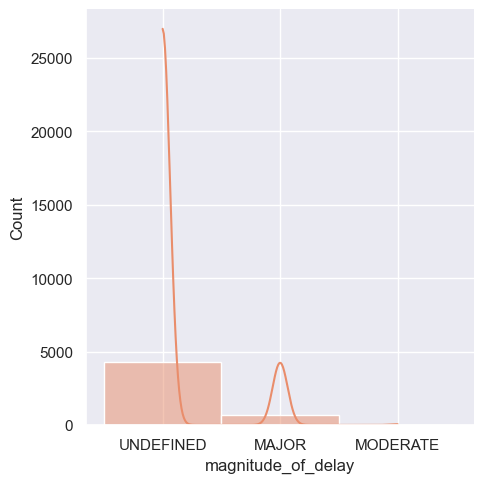

In [149]:
sns.set_theme(palette="flare")

sns.displot(data=traffic, x="magnitude_of_delay", kde=True)
traffic['magnitude_of_delay'].value_counts()

Como 86.28% das entradas da coluna de 'magnitude_of_delay' é 'UNDEFINED' podemos remover também.

In [10]:
traffic.drop(['magnitude_of_delay'], axis=1, inplace=True)
test.drop(['magnitude_of_delay'], axis=1, inplace=True)

traffic.shape

(5000, 10)

Skewness: 6.274560871857796
Kurtosis: 63.136555037655754


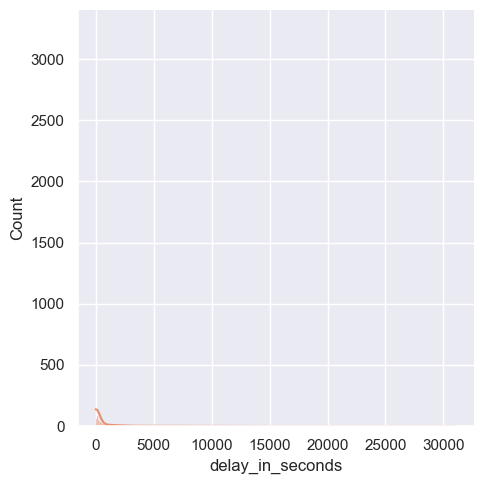

In [151]:
sns.displot(data=traffic, x="delay_in_seconds", kde=True)
print(f"Skewness: {traffic['delay_in_seconds'].skew()}")
print(f"Kurtosis: {traffic['delay_in_seconds'].kurt()}")

In [152]:
traffic['affected_roads'].value_counts(normalize=True)

N101,N101,N101,N101,N101                                                                                                                                      0.308037
N101,N101,N101,N101,N101,                                                                                                                                     0.219329
,                                                                                                                                                             0.144252
N101,N101                                                                                                                                                     0.030315
N101,N101,N101,N101,N101,N101                                                                                                                                 0.023194
                                                                                                                                                                ...  

Para além dos 85 valores nulos, também há ',' entradas que podem ser considerados como NaN.

DARK         2489
LIGHT        2325
LOW_LIGHT     186
Name: luminosity, dtype: int64

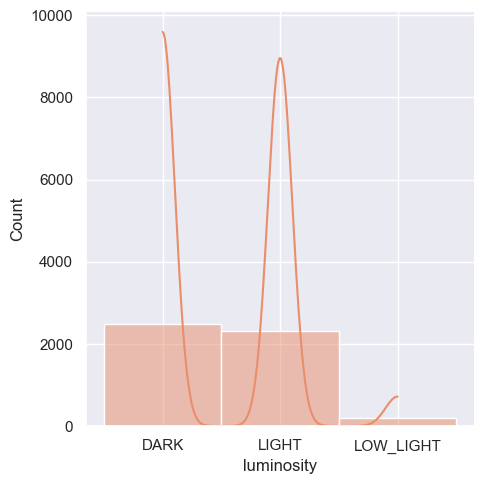

In [153]:
sns.displot(data=traffic, x="luminosity", kde=True)
traffic['luminosity'].value_counts()

Skewness: 0.5605064325594296
Kurtosis: 0.5327725282841129


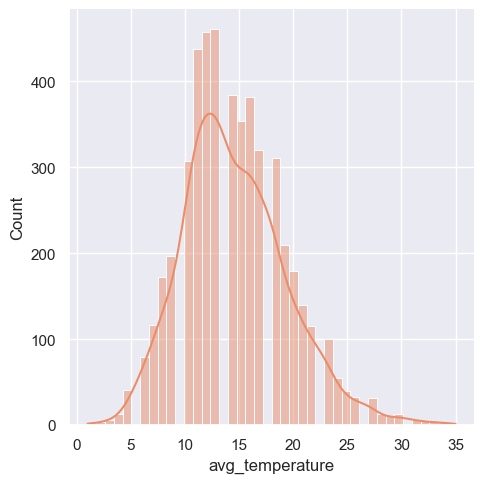

In [154]:
sns.displot(data=traffic, x="avg_temperature", kde=True)
print(f"Skewness: {traffic['avg_temperature'].skew()}")
print(f"Kurtosis: {traffic['avg_temperature'].kurt()}")

Skewness: -0.40439693757842093
Kurtosis: 0.12068039465218394


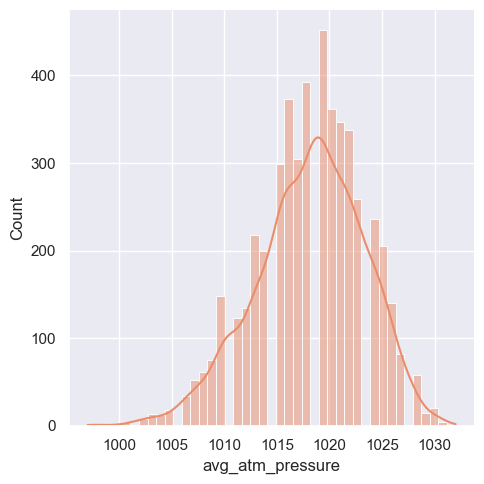

In [155]:
sns.displot(data=traffic, x="avg_atm_pressure", kde=True)
print(f"Skewness: {traffic['avg_atm_pressure'].skew()}")
print(f"Kurtosis: {traffic['avg_atm_pressure'].kurt()}")

Skewness: -0.7626793660840018
Kurtosis: -0.2499175078373752


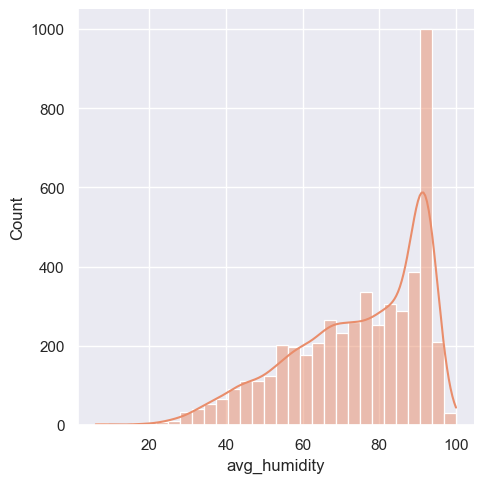

In [156]:
sns.displot(data=traffic, x="avg_humidity", kde=True)
print(f"Skewness: {traffic['avg_humidity'].skew()}")
print(f"Kurtosis: {traffic['avg_humidity'].kurt()}")

Skewness: 1.3610238434403679
Kurtosis: 2.5163102006982214


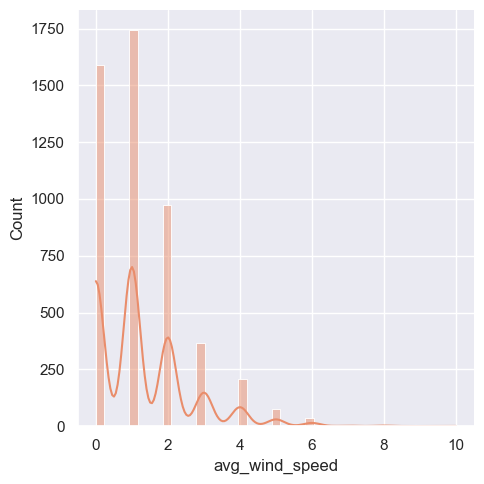

In [157]:
sns.displot(data=traffic, x="avg_wind_speed", kde=True)
print(f"Skewness: {traffic['avg_wind_speed'].skew()}")
print(f"Kurtosis: {traffic['avg_wind_speed'].kurt()}")

Sem Chuva         0.9512
chuva fraca       0.0428
chuva moderada    0.0054
chuva forte       0.0006
Name: avg_rain, dtype: float64

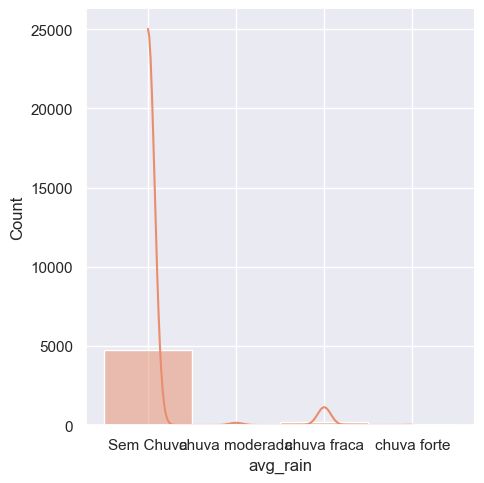

In [158]:
sns.displot(data=traffic, x="avg_rain", kde=True)
traffic['avg_rain'].value_counts(normalize=True)

None         0.4056
High         0.2146
Low          0.1436
Very_High    0.1206
Medium       0.1156
Name: incidents, dtype: float64

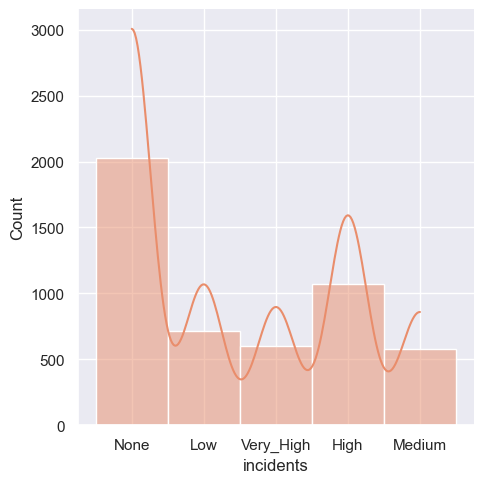

In [159]:
sns.displot(data=traffic, x="incidents", kde=True)
traffic['incidents'].value_counts(normalize=True)

/tmp/ipykernel_921082/3552893030.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(traffic.corr(), annot = True, cmap='coolwarm')


<AxesSubplot: >

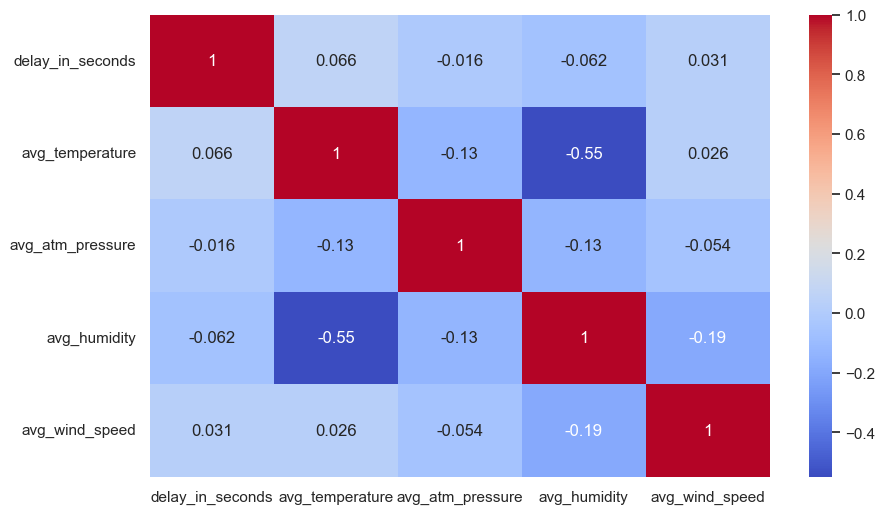

In [160]:
plt.subplots(figsize=(10,6))
sns.heatmap(traffic.corr(), annot = True, cmap='coolwarm')

Como a coluna 'avg_humidity' possue uma skewness alta e tem uma forte correlação com a coluna 'avg_temperature' então pode-se retirar a feature

In [11]:
traffic.drop(['avg_humidity'], axis=1, inplace=True)
test.drop(['avg_humidity'], axis=1, inplace=True)
traffic.shape

(5000, 9)

Antes de remover mais colunas vamos transformar valores categóricos para poder analisar as correlação das freatures com a target variable

### Handling categoric data


* O *incidents* devemos passar para o tipo int(None=0, Low=1, Medium=2,High=3, Very High=4)
* A *luminosity* pode ser passada para o tipo int(Dark=0, Low Light=1, Light=2)
#* O *magnitude_of_delay* também passa para int(UNDEFINED=0, MAJOR=1, MODERATE=2)
* Da mesma forma o *avg_rain* passa para int(Sem Chuva=0, chuva fraca=1, chuva moderada=2, chuva forte =3)

In [12]:
#tratamento de incidents, luminosity, affected_roads, magnitude_of_delay
traffic["incidents"] = traffic['incidents'].replace({'None' : 0, 'Low' : 1, 'Medium' : 2, 'High' : 3, 'Very_High' : 4}).astype(int)
traffic["luminosity"] = traffic['luminosity'].replace({'DARK' : 0, 'LOW_LIGHT' : 1, 'LIGHT' : 2}).astype(int)
traffic["avg_rain"] = traffic['avg_rain'].replace({'Sem Chuva' : 0, 'chuva fraca' : 1, 'chuva moderada' : 2, 'chuva forte' : 3}).astype(int)
#traffic["magnitude_of_delay"] = traffic['magnitude_of_delay'].replace({'UNDEFINED' : 0, 'MAJOR' : 1, 'MODERATE' : 2}).astype(int)

test["luminosity"] = test['luminosity'].replace({'DARK' : 0, 'LOW_LIGHT' : 1, 'LIGHT' : 2}).astype(int)
test["avg_rain"] = test['avg_rain'].replace({'Sem Chuva' : 0, 'chuva fraca' : 1, 'chuva moderada' : 2, 'chuva forte' : 3}).astype(int)
#test["magnitude_of_delay"] = test['magnitude_of_delay'].replace({'UNDEFINED' : 0, 'MAJOR' : 1, 'MODERATE' : 2}).astype(int)

traffic.head()

,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,incidents
0,0,",",2021-03-15 23:00,0,12.0,1013.0,1.0,0,0
1,385,"N101,",2021-12-25 18:00,0,12.0,1007.0,1.0,0,0
2,69,",",2021-03-12 15:00,2,14.0,1025.0,0.0,0,1
3,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,2,15.0,1028.0,1.0,0,4
4,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,2,27.0,1020.0,1.0,0,3


### Creating features

* O *record_date* pode ser dividido em 3 colunas (hora, dia da semana e mês).
    + O dia da semana é posteriormente transformando em números entre 1-7
* O ano é irrelevante já que é sempre 2021.

In [13]:
#transformação da data para datetime
traffic.record_date = pd.to_datetime(traffic.record_date)
test.record_date = pd.to_datetime(test.record_date)

#divisão da coluna record_date em 3 colunas diferentes
traffic['Month'] = traffic.record_date.dt.month
traffic['Hour'] = traffic.record_date.dt.hour
traffic['Day'] = traffic.record_date.dt.day_name()
traffic['Day'] = traffic['Day'].replace({'Sunday' : 1, 'Monday' : 2, 'Tuesday' : 3, 'Wednesday' : 4, 'Thursday' : 5,'Friday' : 6,'Saturday' : 7}).astype(int)
traffic = traffic.drop(['record_date'], axis=1)

test['Month'] = test.record_date.dt.month
test['Hour'] = test.record_date.dt.hour
test['Day'] = test.record_date.dt.day_name()
test['Day'] = test['Day'].replace({'Sunday' : 1, 'Monday' : 2, 'Tuesday' : 3, 'Wednesday' : 4, 'Thursday' : 5,'Friday' : 6,'Saturday' : 7}).astype(int)
test = test.drop(['record_date'], axis=1)

traffic.head()

,delay_in_seconds,affected_roads,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,incidents,Month,Hour,Day
0,0,",",0,12.0,1013.0,1.0,0,0,3,23,2
1,385,"N101,",0,12.0,1007.0,1.0,0,0,12,18,7
2,69,",",2,14.0,1025.0,0.0,0,1,3,15,6
3,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2,15.0,1028.0,1.0,0,4,9,9,4
4,0,"N101,N101,N101,N101,N101,",2,27.0,1020.0,1.0,0,3,6,11,1


/tmp/ipykernel_921082/3552893030.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(traffic.corr(), annot = True, cmap='coolwarm')


<AxesSubplot: >

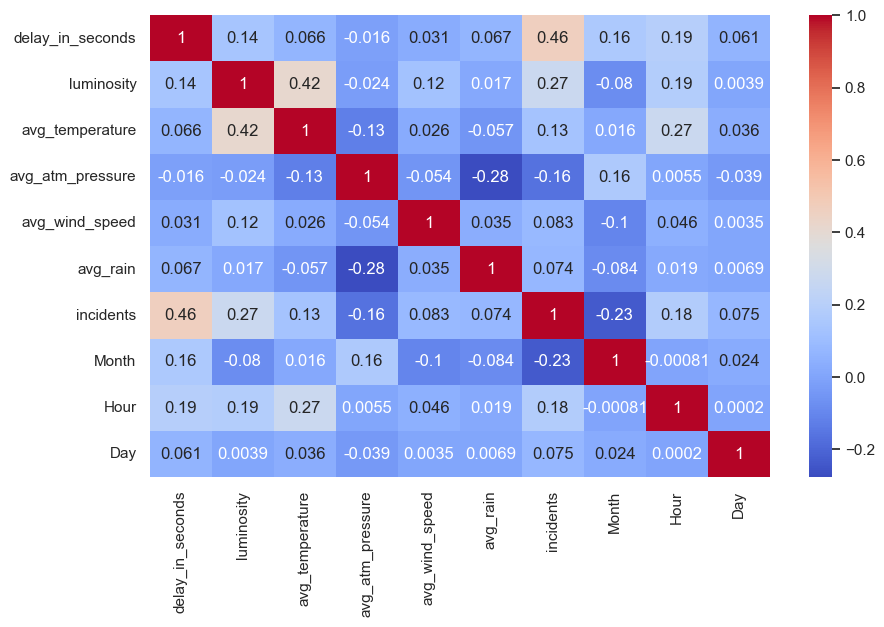

In [164]:
plt.subplots(figsize=(10,6))
sns.heatmap(traffic.corr(), annot = True, cmap='coolwarm')

Analisando agora a matriz de correlação, podemos obeservar que a coluna 'delay_in_seconds' não possue uma relação forte de correlação com a variável 'incidents' e como tem uma skewness e kurtosis muito elevada então podemos remover esta features
Além disso, 'avg_rain' 95% dos dados é sempre 'Sem chuva' e esta feature tem forte correlação com a 'avg_atm_pressure' pelo que também vamos remover.

In [14]:
#traffic.drop(['delay_in_seconds'], axis=1, inplace=True)
traffic.drop(['avg_rain'], axis=1, inplace=True)
#test.drop(['delay_in_seconds'], axis=1, inplace=True)
test.drop(['avg_rain'], axis=1, inplace=True)
traffic.shape

(5000, 10)

Para a feature 'avg_wind_speed' podemos aplicar a transformação logarítmica já que o skewness é positivo e para o kurtosis podemos usar a trasnformação Box-Cox

In [15]:
#Skewness
traffic['avg_wind_speed'] = np.log1p(traffic['avg_wind_speed'])
test['avg_wind_speed'] = np.log1p(test['avg_wind_speed'])

#Kurtosis

Skewness: 0.15859215034127128
Kurtosis: -0.8858931530700036


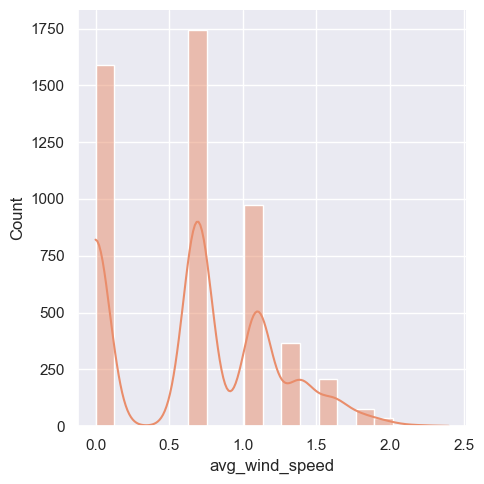

In [167]:
sns.displot(data=traffic, x="avg_wind_speed", kde=True)
print(f"Skewness: {traffic['avg_wind_speed'].skew()}")
print(f"Kurtosis: {traffic['avg_wind_speed'].kurt()}")

In [168]:
#Skewness
#traffic['delay_in_seconds'] = np.log1p(traffic['delay_in_seconds'])
#test['delay_in_seconds'] = np.log1p(test['delay_in_seconds'])

#Kurtosis

Skewness: 3.6493251193863805
Kurtosis: 13.822365566152726


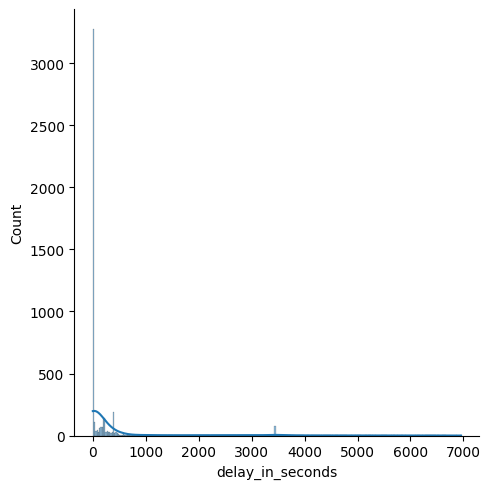

In [22]:
sns.displot(data=traffic, x="delay_in_seconds", kde=True)
print(f"Skewness: {traffic['delay_in_seconds'].skew()}")
print(f"Kurtosis: {traffic['delay_in_seconds'].kurt()}")

### Handling missing data ('affected_roads')

In [170]:
traffic['affected_roads'].value_counts(normalize=True)
#traffic.drop(['affected_roads'], axis=1, inplace=True)

N101,N101,N101,N101,N101                                                                                                                                      0.308037
N101,N101,N101,N101,N101,                                                                                                                                     0.219329
,                                                                                                                                                             0.144252
N101,N101                                                                                                                                                     0.030315
N101,N101,N101,N101,N101,N101                                                                                                                                 0.023194
                                                                                                                                                                ...  

* Primeiro, vamos retirar ',' no final das entradas desta coluna o que vai concatenar os primeiros dois valores mais comuns.
* Depois, os espaços vazios que se formarem são como valores nulos. Portanto, vamos transforma-los em NaN para juntar aos 85 já encontrados e subtiturir pela moda 'N101,N101,N101,N101,N101'.
* Seguidamente, fazemos a filtrazem de valores repetidos, por exemplo, "N101,N101,N101,N101,N101" -> "N101" e registamos o número de estradas diferentes existentes no dataset.
* Por fim, fazemos o encoding, para cada estrada é criada a sua coluna e nas entradas em essa estrada faz parte é colocado um 1 caso contrário fica um 0.

In [16]:
from sklearn.preprocessing import LabelEncoder
# Create a set to store the unique road names
road_set = set()

def filter_roads(col):
    # Clean spaces everywhere in affected_roads
    col = col.str.strip()
    # Drop ',' at the end of entries in affected_roads
    col = col.str.rstrip(',')
    # Replace '' for NaN in affected_roads
    col.replace('', np.nan, inplace=True)
    # Replace NaN for most common value in affected_roads
    col.fillna('N101,N101,N101,N101,N101', inplace=True)
    # Replace '-' for ',' in affected_roads
    col = col.str.replace('-', ',')
    return col

def merge_same_words(line):
    words = line.split(',')
    words_set = set()
    for word in words:
        if word != '' and word != '4':
            words_set.add(word.strip())
            road_set.add(word.strip())
    return ','.join(words)

def encode_roads(road_list, col):
    for road in road_list:
        col[road] = col['affected_roads'].str.contains(road).astype(int)
    return col



traffic['affected_roads'] = filter_roads(traffic['affected_roads'])
# Map the function 'merge_same_words' to the column 'affected_roads'
traffic['affected_roads'] = traffic['affected_roads'].map(merge_same_words)
# Clean spaces everywhere in affected_roads
traffic['affected_roads'] = traffic['affected_roads'].str.strip()
# Drop ',' at the begining of entries in affected_roads
traffic['affected_roads'] = traffic['affected_roads'].str.lstrip(',')
traffic = encode_roads(road_set, traffic)
traffic.drop(['affected_roads'], axis=1, inplace=True)

road_set.clear()


test['affected_roads'] = filter_roads(test['affected_roads'])
# Map the function 'merge_same_words' to the column 'affected_roads'
test['affected_roads'] = test['affected_roads'].map(merge_same_words)
# Clean spaces everywhere in affected_roads
test['affected_roads'] = test['affected_roads'].str.strip()
# Drop ',' at the begining of entries in affected_roads
test['affected_roads'] = test['affected_roads'].str.lstrip(',')
test = encode_roads(road_set, test)
test.drop(['affected_roads'], axis=1, inplace=True)

test.head()


,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,Month,Hour,Day,N207,EM579,N105,N310,N101,IC5,N206,N309,R206
0,1211,2,15.0,1018.0,0.000000,4,19,3,0,0,0,0,1,0,0,0,0
1,0,0,16.0,1018.0,1.098612,10,4,4,0,0,0,0,1,0,0,0,0
2,0,2,22.0,1017.0,0.000000,7,19,1,0,0,0,0,1,0,0,0,0
3,140,2,18.0,1008.0,1.386294,10,15,7,0,0,0,0,1,0,0,0,1
4,0,2,20.0,1022.0,0.000000,10,10,2,0,0,0,0,1,0,0,0,0


In [172]:
traffic.head()
#test.drop(['affected_roads'], axis=1, inplace=True)

,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,incidents,Month,Hour,Day,N206,N309,IC5,N101,N310,R206,N207,EM579,N105
0,0.000000,0,12.0,1013.0,0.693147,0,3,23,2,0,0,0,1,0,0,0,0,0
1,5.955837,0,12.0,1007.0,0.693147,0,12,18,7,0,0,0,1,0,0,0,0,0
2,4.248495,2,14.0,1025.0,0.000000,1,3,15,6,0,0,0,1,0,0,0,0,0
3,7.739794,2,15.0,1028.0,0.693147,4,9,9,4,0,0,0,1,0,1,0,0,1
4,0.000000,2,27.0,1020.0,0.693147,3,6,11,1,0,0,0,1,0,0,0,0,0


<AxesSubplot: >

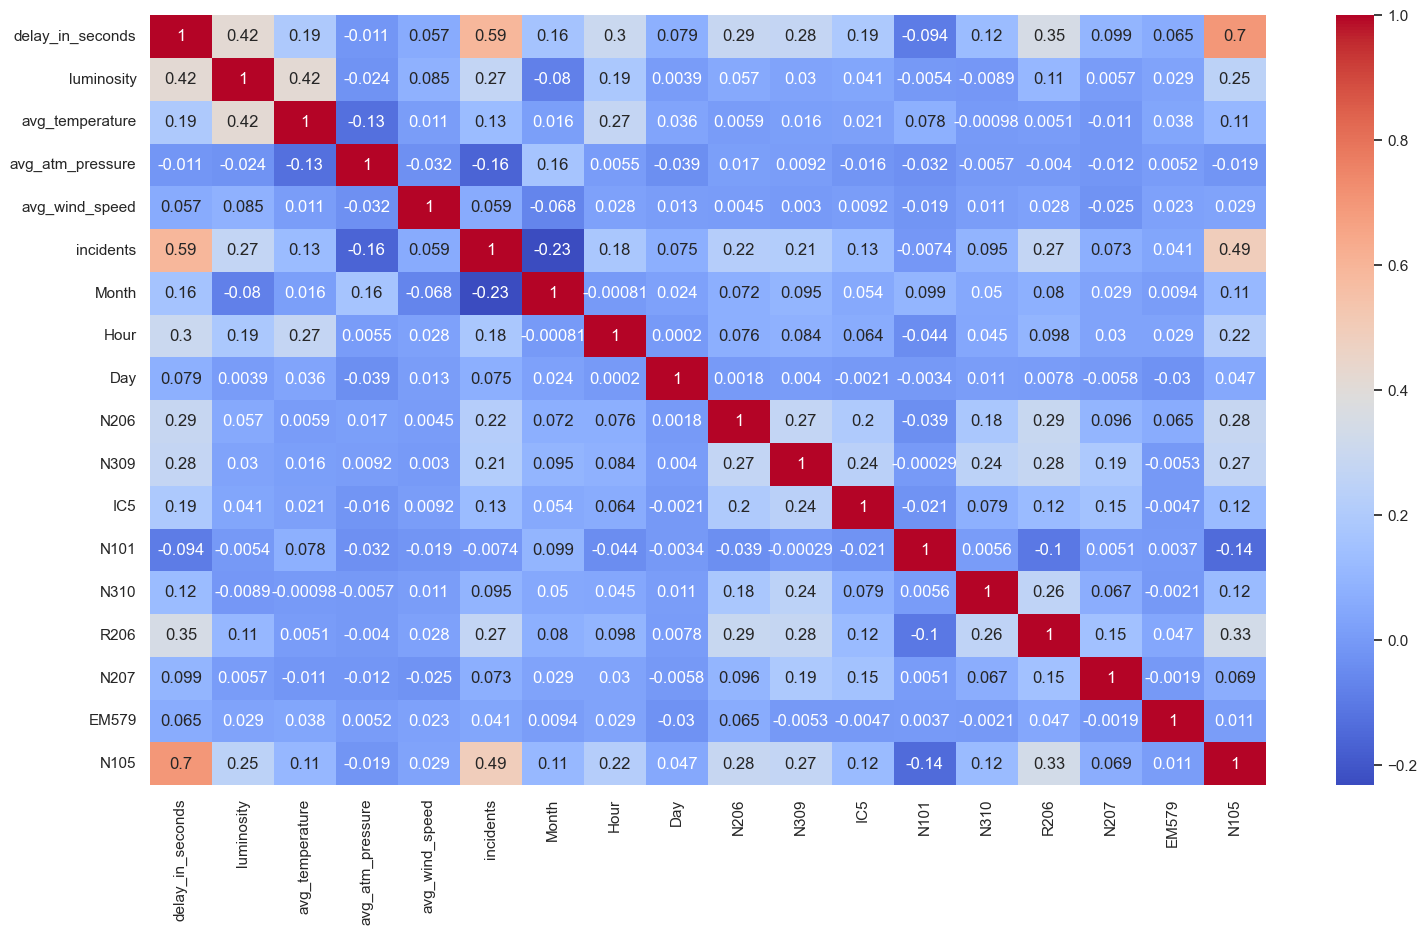

In [173]:
plt.subplots(figsize=(18,10))
sns.heatmap(traffic.corr(), annot = True, cmap='coolwarm')

### Handling Outliers

In [18]:
#ax = sns.boxplot(x=traffic["magnitude_of_delay"])

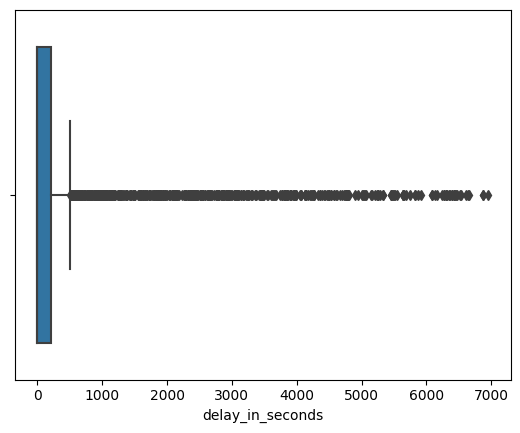

In [21]:
ax = sns.boxplot(x=traffic["delay_in_seconds"])

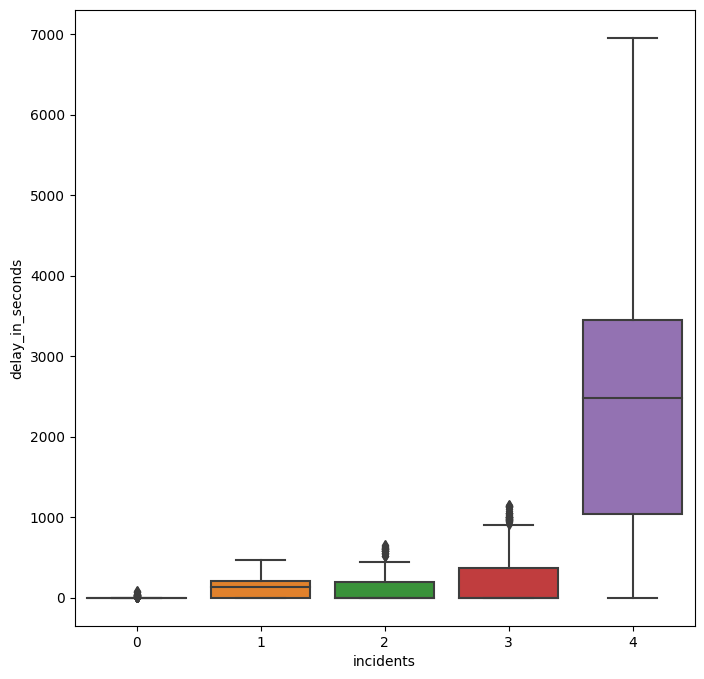

In [20]:
# substitui os outliers pela média
def replace(group):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 1*std
    group[outliers] = mean        # or "group[~outliers].mean()"
    return group

traffic['delay_in_seconds'] = traffic.groupby('incidents')['delay_in_seconds'].transform(replace)
plt.subplots(figsize=(8,8))
ax = sns.boxplot(x=traffic["incidents"], y=traffic["delay_in_seconds"])

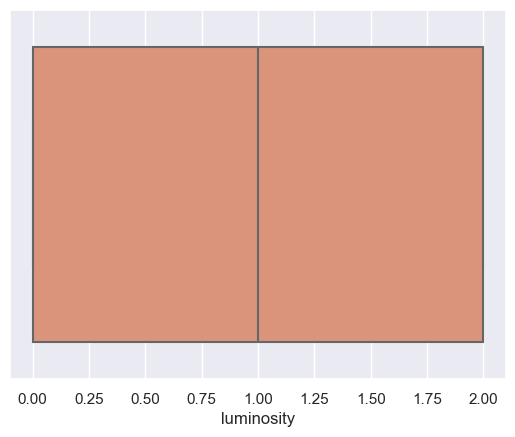

In [71]:
ax = sns.boxplot(x=traffic["luminosity"])

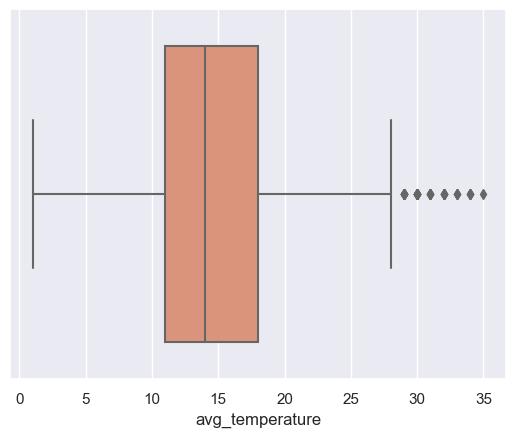

In [72]:
ax = sns.boxplot(x=traffic["avg_temperature"])

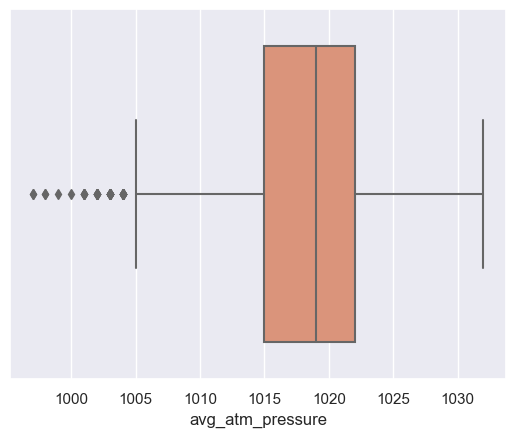

In [73]:
ax = sns.boxplot(x=traffic["avg_atm_pressure"])

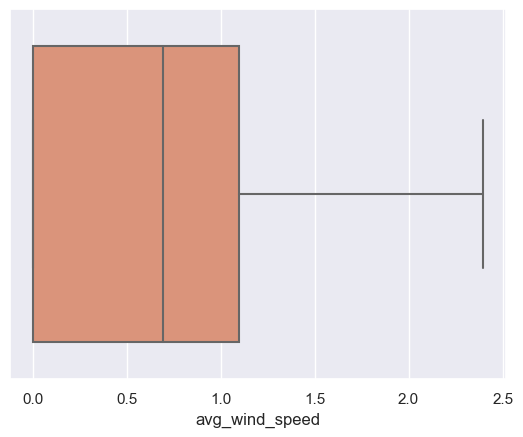

In [74]:
ax = sns.boxplot(x=traffic["avg_wind_speed"])

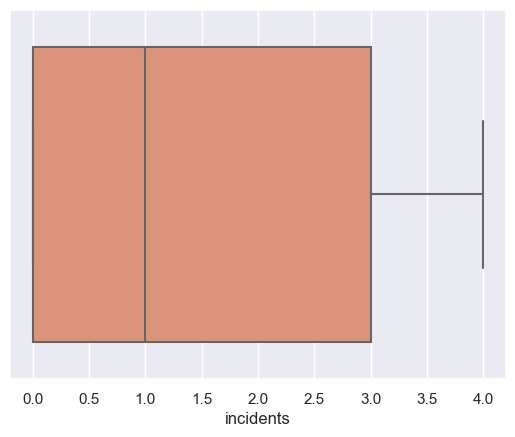

In [75]:
ax = sns.boxplot(x=traffic["incidents"])

### Normalization of Data

* normalização dos dados numéricos para que estes fiquem entre 0 e 1
* utilizar o get_dummies para obter os dados categóricos dividios entre colunas.

In [23]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
traffic[['delay_in_seconds']] = min_max_scaler.fit_transform(traffic[['delay_in_seconds']])
traffic[['avg_temperature']] = min_max_scaler.fit_transform(traffic[['avg_temperature']])
traffic[['avg_atm_pressure']] = min_max_scaler.fit_transform(traffic[['avg_atm_pressure']])
traffic['avg_wind_speed'] = min_max_scaler.fit_transform(traffic[['avg_wind_speed']])
traffic[["Hour"]] = min_max_scaler.fit_transform(traffic[["Hour"]])
traffic[["Month"]] = min_max_scaler.fit_transform(traffic[["Month"]])
#traffic[["Day"]] = min_max_scaler.fit_transform(traffic[["Day"]])

test[['delay_in_seconds']] = min_max_scaler.fit_transform(test[['delay_in_seconds']])
test[['avg_temperature']] = min_max_scaler.fit_transform(test[['avg_temperature']])
test[['avg_atm_pressure']] = min_max_scaler.fit_transform(test[['avg_atm_pressure']])
test['avg_wind_speed'] = min_max_scaler.fit_transform(test[['avg_wind_speed']])
test[["Hour"]] = min_max_scaler.fit_transform(test[["Hour"]])
test[["Month"]] = min_max_scaler.fit_transform(test[["Month"]])
#test[["Day"]] = min_max_scaler.fit_transform(test[["Day"]])
traffic.head()

,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,incidents,Month,Hour,Day,N207,EM579,N105,N310,N101,IC5,N206,N309,R206
0,0.000000,0,0.323529,0.457143,0.289065,0,0.181818,1.000000,2,0,0,0,0,1,0,0,0,0
1,0.001484,0,0.323529,0.285714,0.289065,0,1.000000,0.782609,7,0,0,0,0,1,0,0,0,0
2,0.009919,2,0.382353,0.800000,0.000000,1,0.181818,0.652174,6,0,0,0,0,1,0,0,0,0
3,0.330219,2,0.411765,0.885714,0.289065,4,0.727273,0.391304,4,0,0,1,0,1,0,0,0,1
4,0.000000,2,0.764706,0.657143,0.289065,3,0.454545,0.478261,1,0,0,0,0,1,0,0,0,0


In [24]:
traffic_aux = traffic.drop(['incidents'], axis=1)
traffic_aux = pd.get_dummies(traffic_aux, drop_first = True)
traffic = pd.concat([traffic['incidents'], traffic_aux], axis=1)

test = pd.get_dummies(test, drop_first = True)

Guardar o data set final para a Criação de Modelos 

In [25]:
#Save the data to a csv file
traffic.to_csv('traffic_final.csv', index=False)
test.to_csv('test_final.csv', index=False)